In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

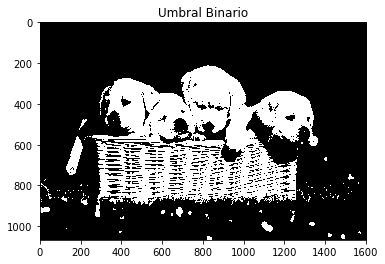

In [6]:
# Leer la imagen
img = cv2.imread('./img_propu/perros.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar umbral binario
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Mostrar la imagen binaria
plt.imshow(binary_img, cmap='gray')
plt.title('Umbral Binario')
plt.show()


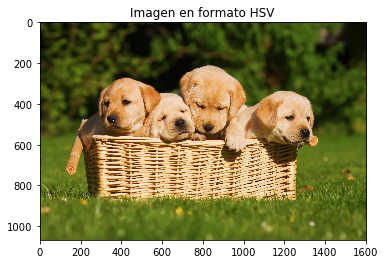

In [8]:
# Leer la imagen en color
img = cv2.imread('./img_propu/perros.jpg')

# Convertir la imagen a HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Guardar la imagen en HSV
cv2.imwrite('./img_propu/perros_HSV.jpg', hsv_img)

# Mostrar la imagen en HSV
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
plt.title('Imagen en formato HSV')
plt.show()


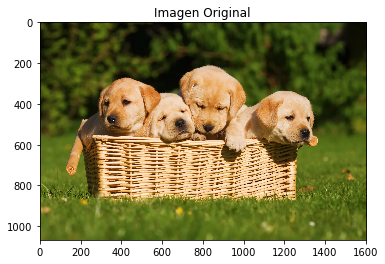

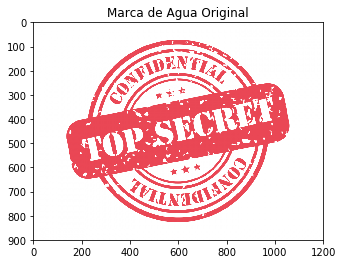

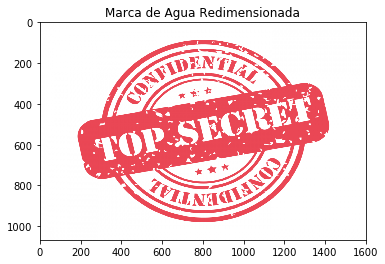

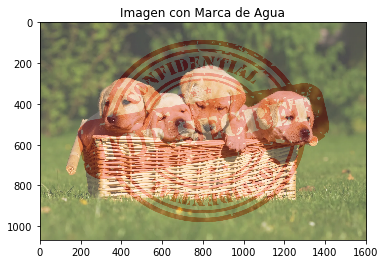

True

In [11]:

# Leer las imágenes
img1 = cv2.imread('./img_propu/perros.jpg')
img2 = cv2.imread('./img_propu/confidencial.png')

# Convertir img1 a RGB para visualizar correctamente con matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)
plt.title('Imagen Original')
plt.show()

# Convertir img2 a RGB para visualizar correctamente con matplotlib
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)
plt.title('Marca de Agua Original')
plt.show()

# Redimensionar la marca de agua para que tenga el mismo tamaño que la imagen principal
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convertir img2_resized a RGB para visualizar correctamente con matplotlib
img2_resized_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)
plt.imshow(img2_resized_rgb)
plt.title('Marca de Agua Redimensionada')
plt.show()

# Aplicar el efecto de marca de agua
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2_resized, beta=0.3, gamma=0)

# Convertir la imagen mezclada a RGB para visualizar correctamente con matplotlib
blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
plt.imshow(blended_rgb)
plt.title('Imagen con Marca de Agua')
plt.show()

# Guardar la imagen con la marca de agua
cv2.imwrite('./img/Perro1_with_watermark.jpg', blended)


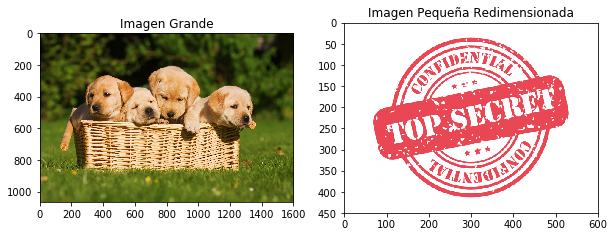

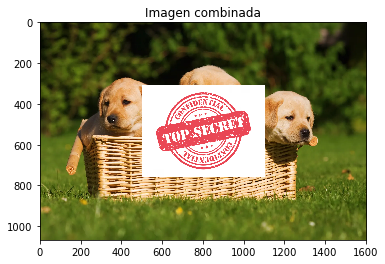

True

In [14]:
# 1. Combinen dos imágenes al agregar una imagen mas pequeña al centro de una imagen grande


# Leer las imágenes desde la carpeta img_propu
large_img = cv2.imread('./img_propu/perros.jpg')
small_img = cv2.imread('./img_propu/confidencial.png')

# Redimensionar la imagen pequeña si es necesario
small_img_resized = cv2.resize(small_img, (600, 450))

# Convertir las imágenes a RGB para visualizarlas correctamente con matplotlib
large_img_rgb = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)
small_img_resized_rgb = cv2.cvtColor(small_img_resized, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes originales
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(large_img_rgb)
plt.title('Imagen Grande')
plt.subplot(1, 2, 2)
plt.imshow(small_img_resized_rgb)
plt.title('Imagen Pequeña Redimensionada')
plt.show()

# Obtener las dimensiones de las imágenes
large_h, large_w = large_img.shape[:2]
small_h, small_w = small_img_resized.shape[:2]

# Calcular la posición para centrar la imagen pequeña
x_offset = (large_w - small_w) // 2
y_offset = (large_h - small_h) // 2

# Agregar la imagen pequeña al centro de la imagen grande
combined = large_img.copy()
combined[y_offset:y_offset+small_h, x_offset:x_offset+small_w] = small_img_resized

# Convertir la imagen combinada a RGB para visualizarla correctamente con matplotlib
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Mostrar la imagen combinada
plt.imshow(combined_rgb)
plt.title('Imagen combinada')
plt.show()

# Guardar la imagen combinada
cv2.imwrite('./img_propu/Perro1_combined.jpg', combined)


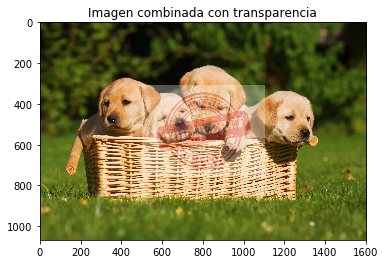

True

In [15]:
# 2. Combinen dos imágenes al agregar una imagen mas pequeña al centro de una imagen grande


# Leer las imágenes desde la carpeta img_propu
large_img = cv2.imread('./img_propu/perros.jpg')
small_img = cv2.imread('./img_propu/confidencial.png')

# Redimensionar la imagen pequeña si es necesario
small_img_resized = cv2.resize(small_img, (600, 450))

# Obtener las dimensiones de las imágenes
large_h, large_w = large_img.shape[:2]
small_h, small_w = small_img_resized.shape[:2]

# Calcular la posición para centrar la imagen pequeña
x_offset = (large_w - small_w) // 2
y_offset = (large_h - small_h) // 2

# Copiar la imagen grande para no modificar el original
combined = large_img.copy()

# Seleccionar la región donde se colocará la imagen pequeña
roi = combined[y_offset:y_offset+small_h, x_offset:x_offset+small_w]

# Aplicar la transparencia (marca de agua)
blended = cv2.addWeighted(src1=roi, alpha=0.7, src2=small_img_resized, beta=0.3, gamma=0)

# Colocar la imagen combinada de vuelta en la imagen grande
combined[y_offset:y_offset+small_h, x_offset:x_offset+small_w] = blended

# Convertir la imagen combinada a RGB para visualizarla correctamente con matplotlib
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Mostrar la imagen combinada
plt.imshow(combined_rgb)
plt.title('Imagen combinada con transparencia')
plt.show()

# Guardar la imagen combinada
cv2.imwrite('./img_propu/Perro2_combined.jpg', combined)


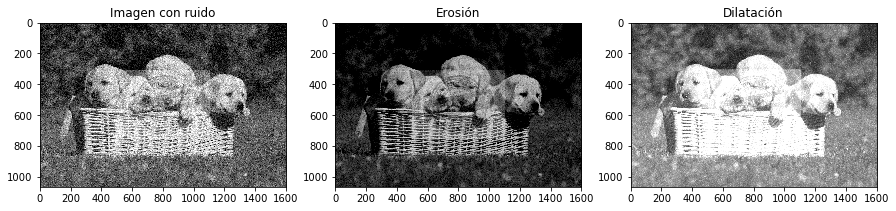

True

In [21]:


# Leer la imagen desde la carpeta img_propu
img = cv2.imread('./img_propu/Perro2_combined.jpg', cv2.IMREAD_GRAYSCALE)

# Agregar ruido a la imagen
noise_img = img + 30 * np.random.randn(*img.shape)
noise_img = np.clip(noise_img, 0, 255).astype(np.uint8)

# Crear un kernel para las operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)

# Aplicar erosión y dilatación para crear un cierre y una apertura
eroded = cv2.erode(noise_img, kernel, iterations=2)
dilated = cv2.dilate(noise_img, kernel, iterations=2)

# Mostrar las imágenes
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(noise_img, cmap='gray')
plt.title('Imagen con ruido')
plt.subplot(132)
plt.imshow(eroded, cmap='gray')
plt.title('Erosión')
plt.subplot(133)
plt.imshow(dilated, cmap='gray')
plt.title('Dilatación')
plt.show()

# Guardar las imágenes resultantes
cv2.imwrite('./img_propu/Perro1_noise.jpg', noise_img)
cv2.imwrite('./img_propu/Perro1_eroded.jpg', eroded)
cv2.imwrite('./img_propu/Perro1_dilated.jpg', dilated)


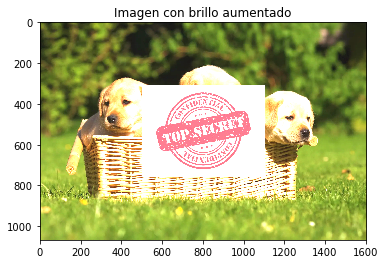

True

In [20]:

# Leer la imagen desde la carpeta img_propu
img = cv2.imread('./img_propu/Perro1_combined.jpg')

# Cambiar el brillo
bright_img = cv2.convertScaleAbs(img, alpha=1.5, beta=20)  # Ajustar alpha y beta según sea necesario

# Mostrar la imagen con brillo cambiado
bright_img_rgb = cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB)
plt.imshow(bright_img_rgb)
plt.title('Imagen con brillo aumentado')
plt.show()

# Guardar la imagen con brillo cambiado
cv2.imwrite('./img_propu/Perro1_bright.jpg', bright_img)

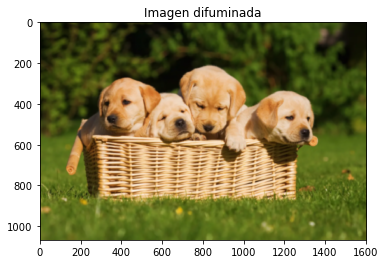

True

In [22]:
# Leer la imagen desde la carpeta img_propu
img = cv2.imread('./img_propu/perros.jpg')

# Aplicar filtro gaussiano para difuminar la imagen
blurred_img = cv2.GaussianBlur(img, (15, 15), 0)

# Mostrar la imagen difuminada
blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_img_rgb)
plt.title('Imagen difuminada')
plt.show()

# Guardar la imagen difuminada
cv2.imwrite('./img_propu/Perro1_blurred.jpg', blurred_img)

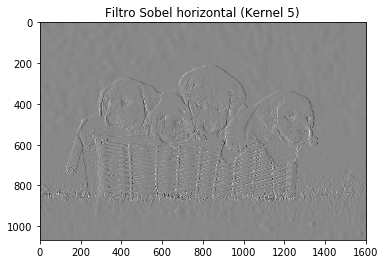

True

In [23]:

# Leer la imagen desde la carpeta img_propu
img = cv2.imread('./img_propu/perros.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro Sobel horizontal
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

# Escalar los valores para visualización
sobelx = cv2.normalize(sobelx, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Mostrar el resultado del filtro Sobel en escala de grises
plt.imshow(sobelx, cmap='gray')
plt.title('Filtro Sobel horizontal (Kernel 5)')
plt.show()

# Guardar el resultado del filtro Sobel
cv2.imwrite('./img_propu/Perro1_sobelx.jpg', sobelx)

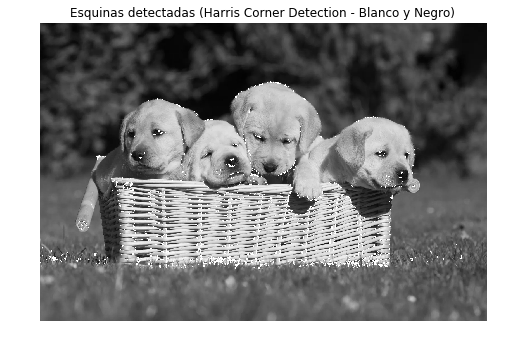

True

In [26]:

# Leer la imagen desde la carpeta img_propu en blanco y negro
img_gray = cv2.imread('./img_propu/perros.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el algoritmo Harris Corner Detection
dst = cv2.cornerHarris(img_gray, 2, 3, 0.04)

# Dilatar los puntos para mejorar la visualización
dst = cv2.dilate(dst, None)

# Umbralizar los puntos para marcar como esquinas
threshold = 0.01 * dst.max()
img_gray_corners = img_gray.copy()
img_gray_corners[dst > threshold] = 255  # Marcar esquinas en blanco

# Mostrar las esquinas detectadas en blanco y negro
plt.figure(figsize=(8, 6))
plt.imshow(img_gray_corners, cmap='gray')
plt.title('Esquinas detectadas (Harris Corner Detection - Blanco y Negro)')
plt.axis('off')
plt.show()

# Guardar la imagen con las esquinas detectadas en blanco y negro
cv2.imwrite('./img_propu/Perro1_corners_gray.jpg', img_gray_corners)

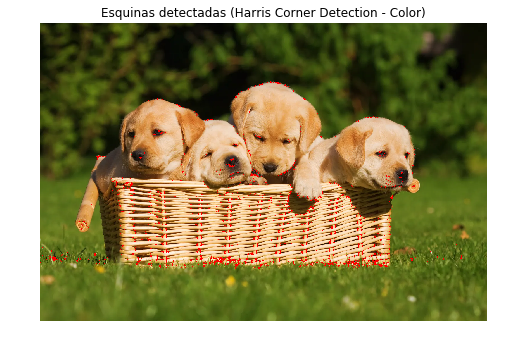

True

In [27]:
# Leer la imagen desde la carpeta img_propu en color
img_color = cv2.imread('./img_propu/perros.jpg', cv2.IMREAD_COLOR)

# Convertir la imagen a escala de grises para detección de esquinas
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Aplicar el algoritmo Harris Corner Detection
dst = cv2.cornerHarris(img_gray, 2, 3, 0.04)

# Dilatar los puntos para mejorar la visualización
dst = cv2.dilate(dst, None)

# Umbralizar los puntos para marcar como esquinas
threshold = 0.01 * dst.max()
img_color_corners = img_color.copy()
img_color_corners[dst > threshold] = [0, 0, 255]  # Marcar esquinas en rojo

# Mostrar las esquinas detectadas a color
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_color_corners, cv2.COLOR_BGR2RGB))
plt.title('Esquinas detectadas (Harris Corner Detection - Color)')
plt.axis('off')
plt.show()

# Guardar la imagen con las esquinas detectadas a color
cv2.imwrite('./img_propu/Perro1_corners_color.jpg', img_color_corners)